# Exercise Set 9

Due: **9:30 13 June 2022**

Discussion: **13:00 17 June 2022**

**Online submission** at via [ILIAS](https://www.ilias.uni-koeln.de/ilias/goto_uk_exc_4593683.html) in the directory Exercises / Übungen -> Submission of Exercises / Rückgabe des Übungsblätter

Data analysis and code development is typically done in larger collaborations. The most common way to do this is with a cloud service suce as [GitHub](https://www.github.com). `git` is a common method used for version control. You can find a descriptions of the various capabilities for example at [Atlassian](https://www.atlassian.com/git/tutorials/setting-up-a-repository).

It is recommended that you register on GitHub to get used to it. For the remainder of the course, you may keep your solutions on GitHub and simply send a link to the necessary folder as the ILIAS submission (for example in an ascii file). If you choose to do so, the requirements for a submission remain the same (submit a self-contained pdf) and additional requirements that your repository is called `DataAnalysis` and the exercise solutions are placed in directories `exercise_x/` (so for exercise 9 it would be `exercise_9/`).

# 1. Regression - Fitting a line [data exercise] **[50 Points]**

In this problem we will fit a linear function $f(x) = y_0 + \beta_0 x$ to the data from datafile: `line_data.dat`.

**a)** Perform the linear regression to fit a linear function $f(x) = y_0 + \beta_0 x$ and plot $f(x)$ together with the data points. **25 Points**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Visualising the raw data

In [2]:
line_data = np.loadtxt('line_datadat.sec')
x = line_data[:,0]
y = line_data[:,1]

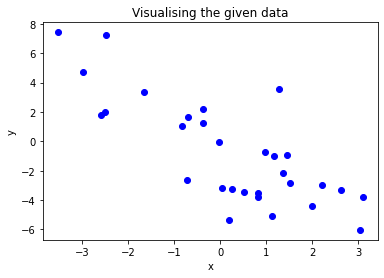

In [3]:
plt.plot(x, y,'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualising the given data')
plt.show()

## Calculating the model parameters

Using the equations derived in lectures

slope : $\beta_0 = \frac{s_y}{s_x}r = -1.596$

intercept: $y_0 = \overline{y} - \beta_0\overline{x} = -0.447$

In [4]:
#calculate the mean
x_mean = np.mean(x)
y_mean = np.mean(y)

#calculate standard deviations
x_std = np.std(x)
y_std = np.std(y)

#calculate correlation coefficeint
r = np.corrcoef(x,y)[0][1]

In [5]:
#calculate the model parameters
b0 = y_std*r/x_std
y0 = y_mean - b0*x_mean

#compute linear fit
y_hat = y0 + b0*x

The slope beta_0 =  -1.596
The intercept y_0 =  -0.447


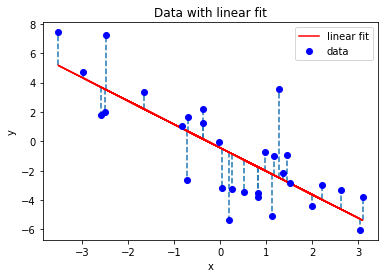

In [6]:
#plot data and the linear fit together
print('The slope beta_0 = ',round(b0,3))
print('The intercept y_0 = ',round(y0,3))
plt.plot(x, y_hat,'r-', label = 'linear fit')
plt.plot(x,y,'bo', label = 'data')
for i in range(len(x)):
    plt.vlines(x = x[i], ymin = y_hat[i], ymax = y[i], linestyles = 'dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data with linear fit')
plt.legend()
plt.show()

**b)** Compute the residuals and plot them. What is $R^2$? **25 Points**

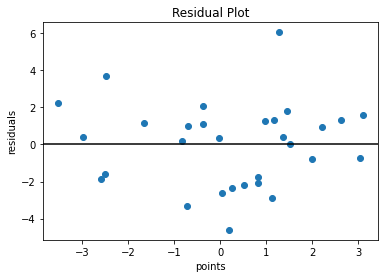

In [7]:
# Calculate Residuals and plot them

residuals = y - y_hat
plt.plot(x,residuals,'o')
plt.axhline(y=0, color ='black')
plt.ylabel('residuals')
plt.xlabel('points')
plt.title('Residual Plot')
plt.show()

In [8]:
#Calculate R squared

SS_tot = np.sum((y-y_mean)**2)
SS_res = np.sum(residuals**2)
R_squared = 1 - (SS_res/SS_tot)
print('The value of R squared is ', R_squared,r**2)

The value of R squared is  0.6124158502151285 0.6124158502151277


$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$

$R^2 = r^2$, where r is pearson coefficient.

We get $R^2 = 0.612$ which is high enough to say that linear model is good fit for the given data.

# 2. Model fit quality assessment **[50 Points]**

In this problem you will assess the quality of a fit by inspecting the residuals of the fit. For each of the
following plots state whether the residuals indicate a reasonable model fit and briefly explain your
conclusion and if applicable how possibly to improve the fit. **50 Points**

depends on the following assumptions:

 the residuals of the model are nearly normal

 the variability of the residuals is nearly constant

 the residuals are independent

 each variable is linearly related to the outcome.

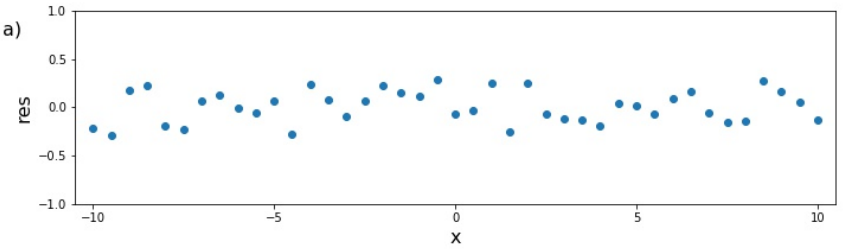

This plot shows the regression fits good because  the residuals are distributed uniformly randomly around the zero x-axes

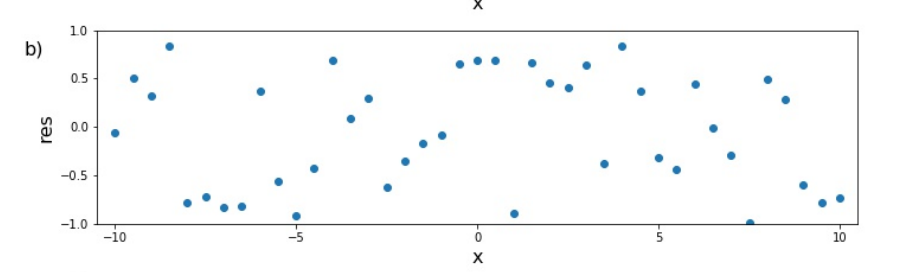

This plot shows the regression fits good because the residuals are distributed uniformly randomly around the zero x-axes

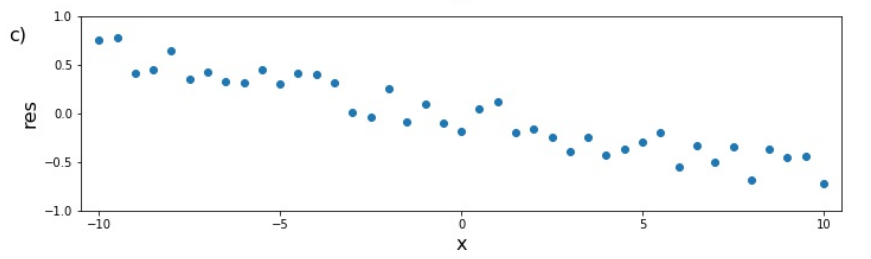

This plot shows the regression doesn't fits good because the residuals are not distributed uniformly randomly around the zero x-axes

There are some possible reasons for the special pattern (not random) in the plot:

1. Missing some independent variables

2. The fitting function would be with Polynomial (higher-order) terms

To improve the quality of fitting better, there are some ways to do:

1. Find more predictor variables
2. Add higher-order term in fitting fuction

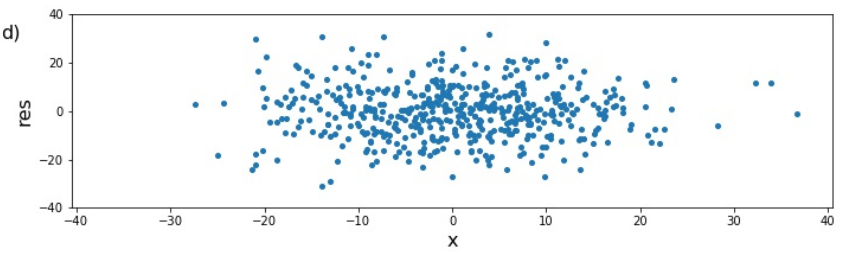

This plot shows the regression fits good because the residuals are distributed uniformly randomly around the zero x-axes and doesn't form any clusters.

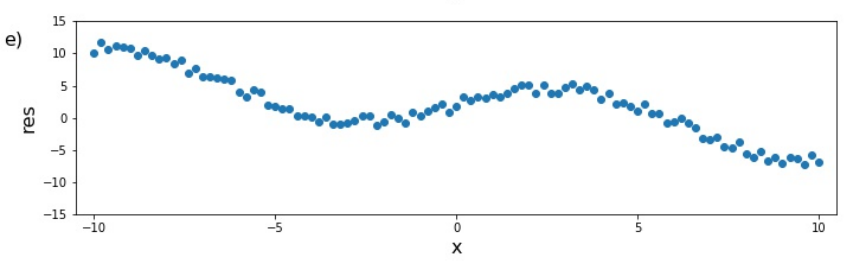

This plot shows the regression doesn't fits good because the residuals are not distributed uniformly randomly around the zero x-axes

There are some possible reasons for the special pattern (not random) in the plot:

1. Missing some independent variables

2. The fitting function would be with Polynomial (higher-order) terms

To improve the quality of fitting better, there are some ways to do:

1. Find more predictor variables

2. Add higher-order term in fitting fuction